# Crime Data Analysis

- Your analysis here
  
---

In [47]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import hvplot.pandas

# Files to Load
data_2010_2019 = Path("Crime_Data_from_2010_to_2019 (1).csv")
data_2020_2023 = Path("Crime_Data_from_2020_to_Present_20231016.csv")

# Read data(2010-2019) and data (2020- present)Data File and store into Pandas DataFrames
pre_covid_data = pd.read_csv(data_2010_2019)
post_covid_data = pd.read_csv(data_2020_2023)

# Combine the data into a single dataset.  
Data_complete = pd.concat([pre_covid_data, post_covid_data], ignore_index=True)
Data_complete.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,AREA
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13.0,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,NaN
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14.0,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,NaN
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13.0,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524,NaN
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6.0,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,NaN
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1.0,Central,176,1,122,"RAPE, ATTEMPTED",...,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488,NaN


Data Cleaning


In [48]:
# Create a Year column from the dataframe
Data_complete['Crime Year'] = pd.to_datetime(Data_complete['Date Rptd']).dt.year

C:\Users\dcase\AppData\Local\Temp\ipykernel_30484\975316320.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Data_complete['Crime Year'] = pd.to_datetime(Data_complete['Date Rptd']).dt.year


In [49]:
# Remove unused columns
Data_complete.drop(Data_complete.columns[[1, 2, 3, 4, 6, 7, 10, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,28]], axis=1, inplace=True)

In [50]:
# Remove NaN entries
Data_complete = Data_complete.dropna()

# Clean data for duplicate crime records
Data_complete = Data_complete.drop_duplicates(subset=['DR_NO'])

# Remove unrecorded victim age data
Data_complete = Data_complete[Data_complete['Vict Age'] > 0]

In [51]:
# Change the name of the columns to complete the data cleaning
Data_complete.rename(columns={
                    'DR_NO':'DR Number',
                    'Crime Year': 'Crime Year',
                    'AREA NAME': 'Area Name',
                    'Crm Cd': 'Crime Code',
                    'Crm Cd Desc':'Type of Crime',
                    'Vict Age': 'Victim Age',
                    'Vict Sex': 'Victim Gender',
                    'Vict Descent': 'Victim Ethnicity',
                    'Premis Desc': 'Scene of Crime',
                    'LAT': 'Latitude',
                    'LON': 'Longitude'
                    
},inplace= True)

# Remove coordinates outside of Los Angeles
Data_complete = Data_complete[(Data_complete['Longitude'] < -108) & (Data_complete['Longitude'] > -128)]
Data_complete = Data_complete[(Data_complete['Latitude'] < 44) & (Data_complete['Latitude'] > 24)]

Data_complete.head()

,DR Number,Area Name,Crime Code,Type of Crime,Victim Age,Victim Gender,Victim Ethnicity,Scene of Crime,Latitude,Longitude,Crime Year
0,1307355,Newton,900,VIOLATION OF COURT ORDER,48,M,H,SINGLE FAMILY DWELLING,33.9825,-118.2695,2010
3,90631215,Hollywood,900,VIOLATION OF COURT ORDER,47,F,W,STREET,34.1016,-118.3295,2010
4,100100501,Central,122,"RAPE, ATTEMPTED",47,F,H,ALLEY,34.0387,-118.2488,2010
5,100100506,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,B,DEPARTMENT STORE,34.0480,-118.2577,2010
6,100100508,Central,330,BURGLARY FROM VEHICLE,46,M,H,STREET,34.0389,-118.2643,2010


## Data Analysis

In [52]:
count = len(Data_complete["DR Number"])
print(count)

2326755


In [53]:
unique_demo = Data_complete["Victim Ethnicity"].value_counts()
print(unique_demo)

Victim Ethnicity
H    935637
W    614452
B    439523
O    215463
A     66466
X     27010
K     12240
F      5856
C      4143
I      1667
J      1532
V      1035
P       553
Z       544
U       275
G       137
D        82
S        70
L        67
-         3
Name: count, dtype: int64


In [54]:
unique_demo = Data_complete["Victim Ethnicity"].value_counts()
print(unique_demo)

Victim Ethnicity
H    935637
W    614452
B    439523
O    215463
A     66466
X     27010
K     12240
F      5856
C      4143
I      1667
J      1532
V      1035
P       553
Z       544
U       275
G       137
D        82
S        70
L        67
-         3
Name: count, dtype: int64


In [55]:
unique_demo = Data_complete["Area Name"].value_counts()
print(unique_demo)

Area Name
77th Street    162661
Southwest      157831
Central        129682
Pacific        123609
N Hollywood    121398
Southeast      121364
Hollywood      112653
Van Nuys       110707
Topanga        108836
West LA        104894
Wilshire       104735
Newton         104438
Rampart        103823
Northeast      103634
Devonshire     101991
Mission        100765
Olympic         98740
West Valley     97832
Harbor          93800
Foothill        85477
Hollenbeck      77885
Name: count, dtype: int64


## Annual Crime Analysis

In [56]:
# Get the total number of crimes by year
yearly_total = Data_complete["DR Number"].groupby(Data_complete["Crime Year"]).count().reset_index()
yearly_total.rename(columns={"DR Number": "Total Crimes"}, inplace=True)

# Add a column that calculates the yearly rate of change in crime
yearly_total['Percentage Change'] = yearly_total['Total Crimes'].pct_change() * 100

# Convert NaN first row to a dash
yearly_total['Percentage Change'].iloc[0] = '-'
yearly_total.set_index('Crime Year', inplace=True)
yearly_total

C:\Users\dcase\AppData\Local\Temp\ipykernel_30484\3549342305.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_total['Percentage Change'].iloc[0] = '-'


,Total Crimes,Percentage Change
Crime Year,,
2010,165841,-
2011,165353,-0.294258
2012,167092,1.051689
2013,161037,-3.623752
2014,136966,-14.947497
2015,173958,27.008163
2016,183310,5.37601
2017,186878,1.94643
2018,187540,0.354242


In [57]:
# Create a Summary Statistics table of the total crimes over the entire dataset
yearly_sum_stats = yearly_total.describe()
yearly_sum_stats

,Total Crimes
count,14.000000
mean,166196.785714
std,17733.805332
min,130096.000000
25%,159591.000000
50%,166466.500000
75%,180292.500000
max,187540.000000


In [58]:
# Obtain the first and third quartiles
Q1 = yearly_sum_stats.loc['25%']
Q3 = yearly_sum_stats.loc['75%']

# Calculate the IQR
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print lower and upper Bounds to find the range for determining outliers
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: Total Crimes    128538.75
dtype: float64
Upper Bound: Total Crimes    211344.75
dtype: float64


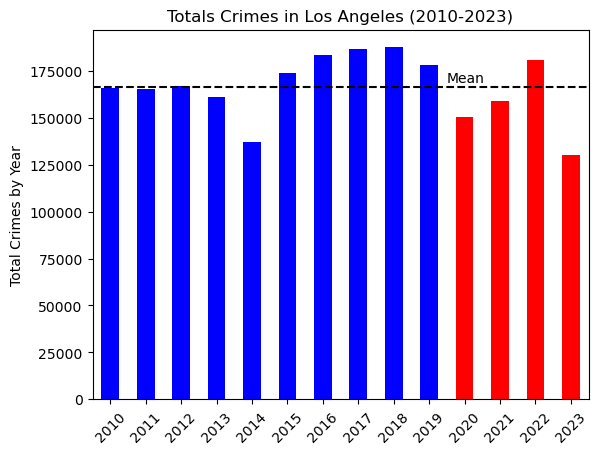

In [59]:
# Bar plot of the total crime count over the length of the dataset
yearly_total_plot = yearly_total
mean_total = yearly_sum_stats.loc['mean', 'Total Crimes']

# Use list comprehension to change the covid years to red
covid_color = ["r" if year >= 2020 else "b" for year in yearly_total_plot.index]
yearly_total_plot.plot.bar(y = "Total Crimes", 
                       color= covid_color,
                       legend = False)

plt.axhline(y=mean_total, color='black', linestyle='--')
plt.text(9.5, 169000, "Mean")
plt.xlabel("")
plt.xticks(rotation=45)
plt.ylabel("Total Crimes by Year")
plt.title("Totals Crimes in Los Angeles (2010-2023)")
plt.savefig("output_data/TotalCrimeYTY.png", bbox_inches="tight")
plt.show()

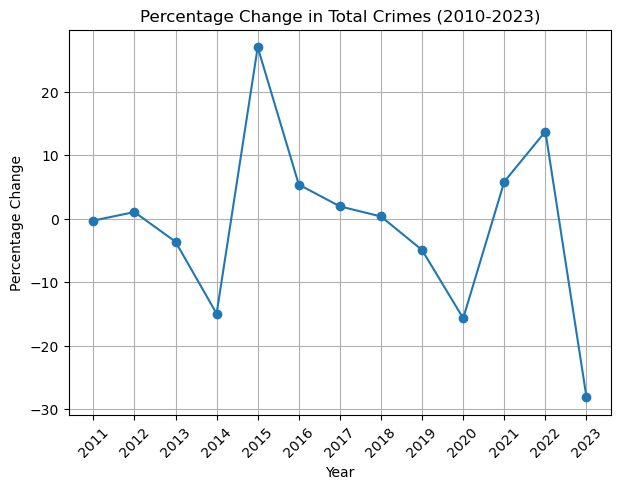

In [60]:
# Line graph showing the percentage change in total crimes year-to-year
yearly_total_index_reset = yearly_total.reset_index()
percent_plot = yearly_total_index_reset.iloc[1:]
plt.figure(figsize=(7, 5))
plt.plot(percent_plot["Crime Year"], percent_plot["Percentage Change"], marker='o', linestyle='-')
plt.title("Percentage Change in Total Crimes (2010-2023)")
plt.xlabel("Year")
plt.ylabel("Percentage Change")
plt.xticks(percent_plot["Crime Year"], rotation=45)
plt.grid(True)
plt.savefig("output_data/PercentChangeYTY.png", bbox_inches="tight")
plt.show()

The r-value is: 0.00958871336415062
The p-value is: 0.7391099986438103


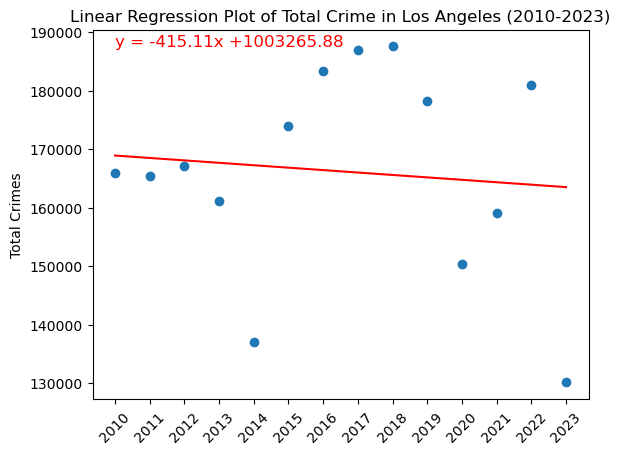

In [61]:
# Linear Regression plot
slope, intercept, rvalue, pvalue, stderr = stats.linregress(yearly_total_index_reset["Crime Year"], yearly_total_index_reset["Total Crimes"])
regress = yearly_total_index_reset["Crime Year"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept, 2))
plt.scatter(yearly_total_index_reset["Crime Year"], yearly_total_index_reset["Total Crimes"])
plt.plot(yearly_total_index_reset["Crime Year"], regress, "r-")
plt.xticks(yearly_total_index_reset["Crime Year"], rotation=45)
plt.ylabel("Total Crimes")
plt.title("Linear Regression Plot of Total Crime in Los Angeles (2010-2023)")
plt.annotate(line_eq, (min(yearly_total_index_reset["Crime Year"]), max(yearly_total_index_reset["Total Crimes"])-1), fontsize=12, color="red")
plt.savefig("output_data/LinearRegressionYTY.png", bbox_inches="tight")
print(f"The r-value is: {rvalue ** 2}")
print(f"The p-value is: {pvalue}")
plt.show()

In [62]:
# T-Test of Pre-Covid and Covid-Era Total Crimes
# Slice the dataframe to create Pre-Covid and Covid-Era
pre_covid_slice = yearly_total_index_reset[(yearly_total_index_reset['Crime Year'] >= 2010) & (yearly_total_index_reset['Crime Year'] <= 2019)]
covid_slice = yearly_total_index_reset[(yearly_total_index_reset['Crime Year'] >= 2020) & (yearly_total_index_reset['Crime Year'] <= 2023)]

# Calculate the mean for before and after covid
pre_covid_mean = pre_covid_slice['Total Crimes'].mean()
covid_mean = covid_slice['Total Crimes'].mean()

print(pre_covid_mean)
print(covid_mean)
# Perform a t-test to compare the means of the two groups
stats.ttest_ind(pre_covid_slice['Total Crimes'], covid_slice['Total Crimes'], equal_var=False)

170625.6
155124.75


TtestResult(statistic=1.338751003517169, pvalue=0.2469269015163375, df=4.308733471007452)

In [63]:
# Define function to pull the most common occurring value in each column
def highest_occurance(column):
    return column.value_counts().idxmax()

# Group the data by 'Crime Year' and apply the most_frequent_value function to each column
highest_occurance = Data_complete.groupby('Crime Year').agg({
                    'Area Name': highest_occurance,
                    'Crime Code': highest_occurance,
                    'Type of Crime': highest_occurance,
                    'Victim Age': highest_occurance,
                    'Victim Gender': highest_occurance,
                    'Victim Ethnicity': highest_occurance,
                    'Scene of Crime': highest_occurance
                    }).reset_index()

In [64]:
# Create Yearly Summary table by merging the two new yearly analysis dataframes
yearly_summary_df = pd.merge(yearly_total, highest_occurance, on='Crime Year')
yearly_summary_df.set_index('Crime Year', inplace=True)
yearly_summary_df

,Total Crimes,Percentage Change,Area Name,Crime Code,Type of Crime,Victim Age,Victim Gender,Victim Ethnicity,Scene of Crime
Crime Year,,,,,,,,,
2010,165841,-,77th Street,624,BATTERY - SIMPLE ASSAULT,25,F,H,SINGLE FAMILY DWELLING
2011,165353,-0.294258,77th Street,624,BATTERY - SIMPLE ASSAULT,25,F,H,SINGLE FAMILY DWELLING
2012,167092,1.051689,77th Street,624,BATTERY - SIMPLE ASSAULT,26,F,H,SINGLE FAMILY DWELLING
2013,161037,-3.623752,77th Street,624,BATTERY - SIMPLE ASSAULT,23,F,H,SINGLE FAMILY DWELLING
2014,136966,-14.947497,77th Street,624,BATTERY - SIMPLE ASSAULT,23,F,H,SINGLE FAMILY DWELLING
2015,173958,27.008163,77th Street,624,BATTERY - SIMPLE ASSAULT,25,M,H,SINGLE FAMILY DWELLING
2016,183310,5.37601,77th Street,624,BATTERY - SIMPLE ASSAULT,25,F,H,SINGLE FAMILY DWELLING
2017,186878,1.94643,77th Street,624,BATTERY - SIMPLE ASSAULT,27,M,H,SINGLE FAMILY DWELLING
2018,187540,0.354242,Southwest,624,BATTERY - SIMPLE ASSAULT,28,M,H,SINGLE FAMILY DWELLING
